<h1> TP - Descente de Gradient </h1>

Dans ce TP, nous allons implémter la descente de gradient, sous différentes formes : stochastique, mini-batch et batch. Nous prenons comme exemple un problème de régression linéaire, que nous allons résoudre par descente de gradient.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import time


In [2]:
plt.style.use(['ggplot'])

## Création d'un dataset

<h5> Genérons des données avec:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

et ajoutons un bruit gaussien aux données.

In [3]:
n = 1000
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1) * 2

Vérifions les données générées avec un plot 

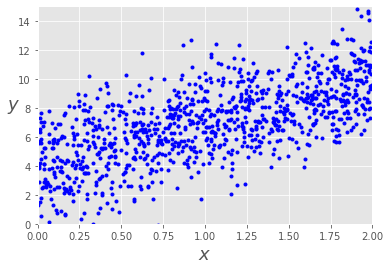

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ = plt.axis([0, 2, 0, 15])

##  Exemple de la régression linéaire : solution analytique 

La solution analytique de la régression linéaire est obtenue ainsi :

In [5]:
X_b = np.c_[np.ones((n,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.02714045]
 [2.90312532]]


Ce résultat est proches des valeurs de thetas fixées à 4 et 3. 

Elles ne peuvent pas être exactes du fait du bruit que nous avons introduit dans les données.

In [6]:
X_new = np.array([[0], [2]])
print("Nouvel échantillon, X_new:\n", X_new)

X_new_b = np.c_[np.ones((2, 1)), X_new] # ajout du biais 
print("Ajout du biais, X_new_b:\n", X_new_b)

print("\nPrédiction pour ce nouveau point:")

y_predict = X_new_b.dot(theta_best)
y_predict[1]

Nouvel échantillon, X_new:
 [[0]
 [2]]
Ajout du biais, X_new_b:
 [[1. 0.]
 [1. 2.]]

Prédiction pour ce nouveau point:


array([9.8333911])

### Question 1:

Afficher la droite de régression obtenue avec ces paramètres theta sur le même graphique que le nuage de points.

[0, 2, 0, 15]

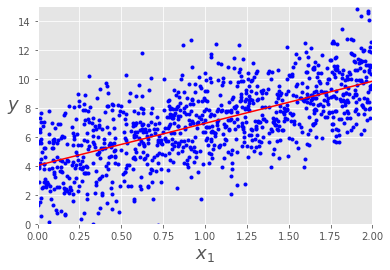

In [8]:
plt.plot(X, y, 'b.')
#Affichage de la droite
plt.plot(X_new, y_predict, 'r-')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


# Descente de gradient

## Fonction de coût & Gradients

L'équation de calcul de la fonction de coût et des gradients est présentée ci-dessous. Veuillez noter que la fonction de coût est calculée pour la régression linéaire. Pour d'autres algorithmes, la fonction de coût sera différente et les gradients devront être dérivés de cette fonction de coût.



<b>Fonction de coût</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

### Question 2:

Implémenter la fonction de coût **cost(theta,X,y)**

In [13]:
def cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    m = len(y)
    predictions = X.dot(theta)
    cost = 1 / (2 * m) * np.sum(np.square(predictions - y))
    return cost


### Question 3:

Completer cette fonction réalisant la descente de gradient.

Indication : à chaque itération, on met à jour theta grâce au terme (learning_rate * gradient). Attention au signe !

In [25]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):
        predictions = X.dot(theta)
        theta -= learning_rate * (1 / m) * X.T.dot(predictions - y)
        
        
        #A completer : prediction et mise à jour de theta
      
        
        # sauvegarde du coût et des paramètres pour l'itération en cours
        theta_history[it, :] = theta.T
        cost_history[it] = cost(theta, X, y)
        
    return theta, cost_history, theta_history

Nous allons maintenant utiliser cette fonction pour réaliser une descente de gradient. Commençons par 500 itérations et un taux d'apprentissage (*learning rate*) de 0,01. Initialisation thêta via un tirage d'une distribution gaussienne

In [32]:
lr =.01
n_iter = 500

theta = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(X), 1)), X]

start_time = time.time()
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)
end_time = time.time()


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Temps écoulé:', end_time - start_time)

Theta0:          4.187,
Theta1:          2.770
Final cost/MSE:  1.954
Temps écoulé: 0.060460805892944336


Visualisons l'évolution de la fonction de coût au fur et à mesure des itérations 

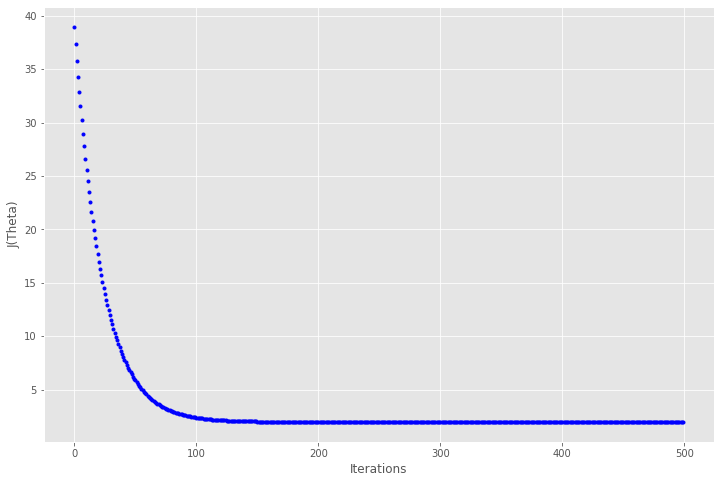

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_ = ax.plot(range(n_iter), cost_history, 'b.')

Après environ 150 itérations, la fonction de coût devient asymptotique, de sorte que les itérations restantes ne sont pas nécessaires ou ne donneront pas lieu à une optimisation supplémentaire. Zoomons jusqu'à l'itération 200 et voyons la courbe plus en détails.

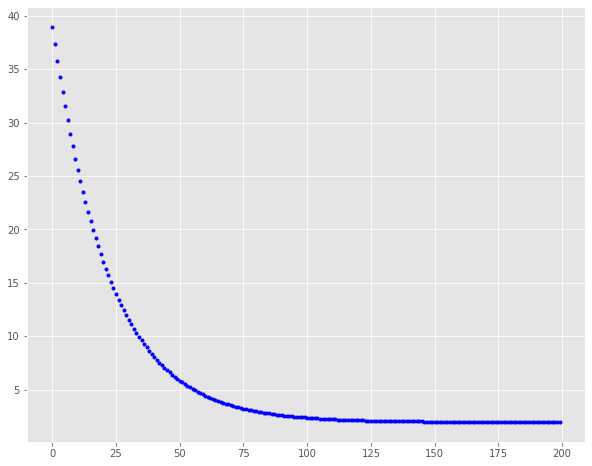

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = ax.plot(range(200), cost_history[:200], 'b.')

On remarque que le coût diminue plus rapidement au début et qu'ensuite le gain de réduction des coûts n'est pas aussi important.

Il serait interessant de voir l'effet de différents taux d'apprentissage et du nombre d'itérations.

Construisons donc une fonction qui montre ces effets et comment la descente de gradient fonctionne plus en détails.

In [35]:
def plot_GD(n_iter, lr, ax, ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot

    """
    _ = ax.plot(X, y, 'b.')
    theta = np.random.randn(2, 1)

    tr = 0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, h, _ = gradient_descent(X_b, y, theta, lr, 1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if i % 25 == 0:
            _ = ax.plot(X, pred, 'r-', alpha=tr)
            if tr < 0.8:
                tr = tr + 0.2
    if not ax1 == None:
        _ = ax1.plot(range(n_iter), cost_history, 'b.')  

On trace les plot pour différentes combinaisons d'itérations et de taux d'apprentissage

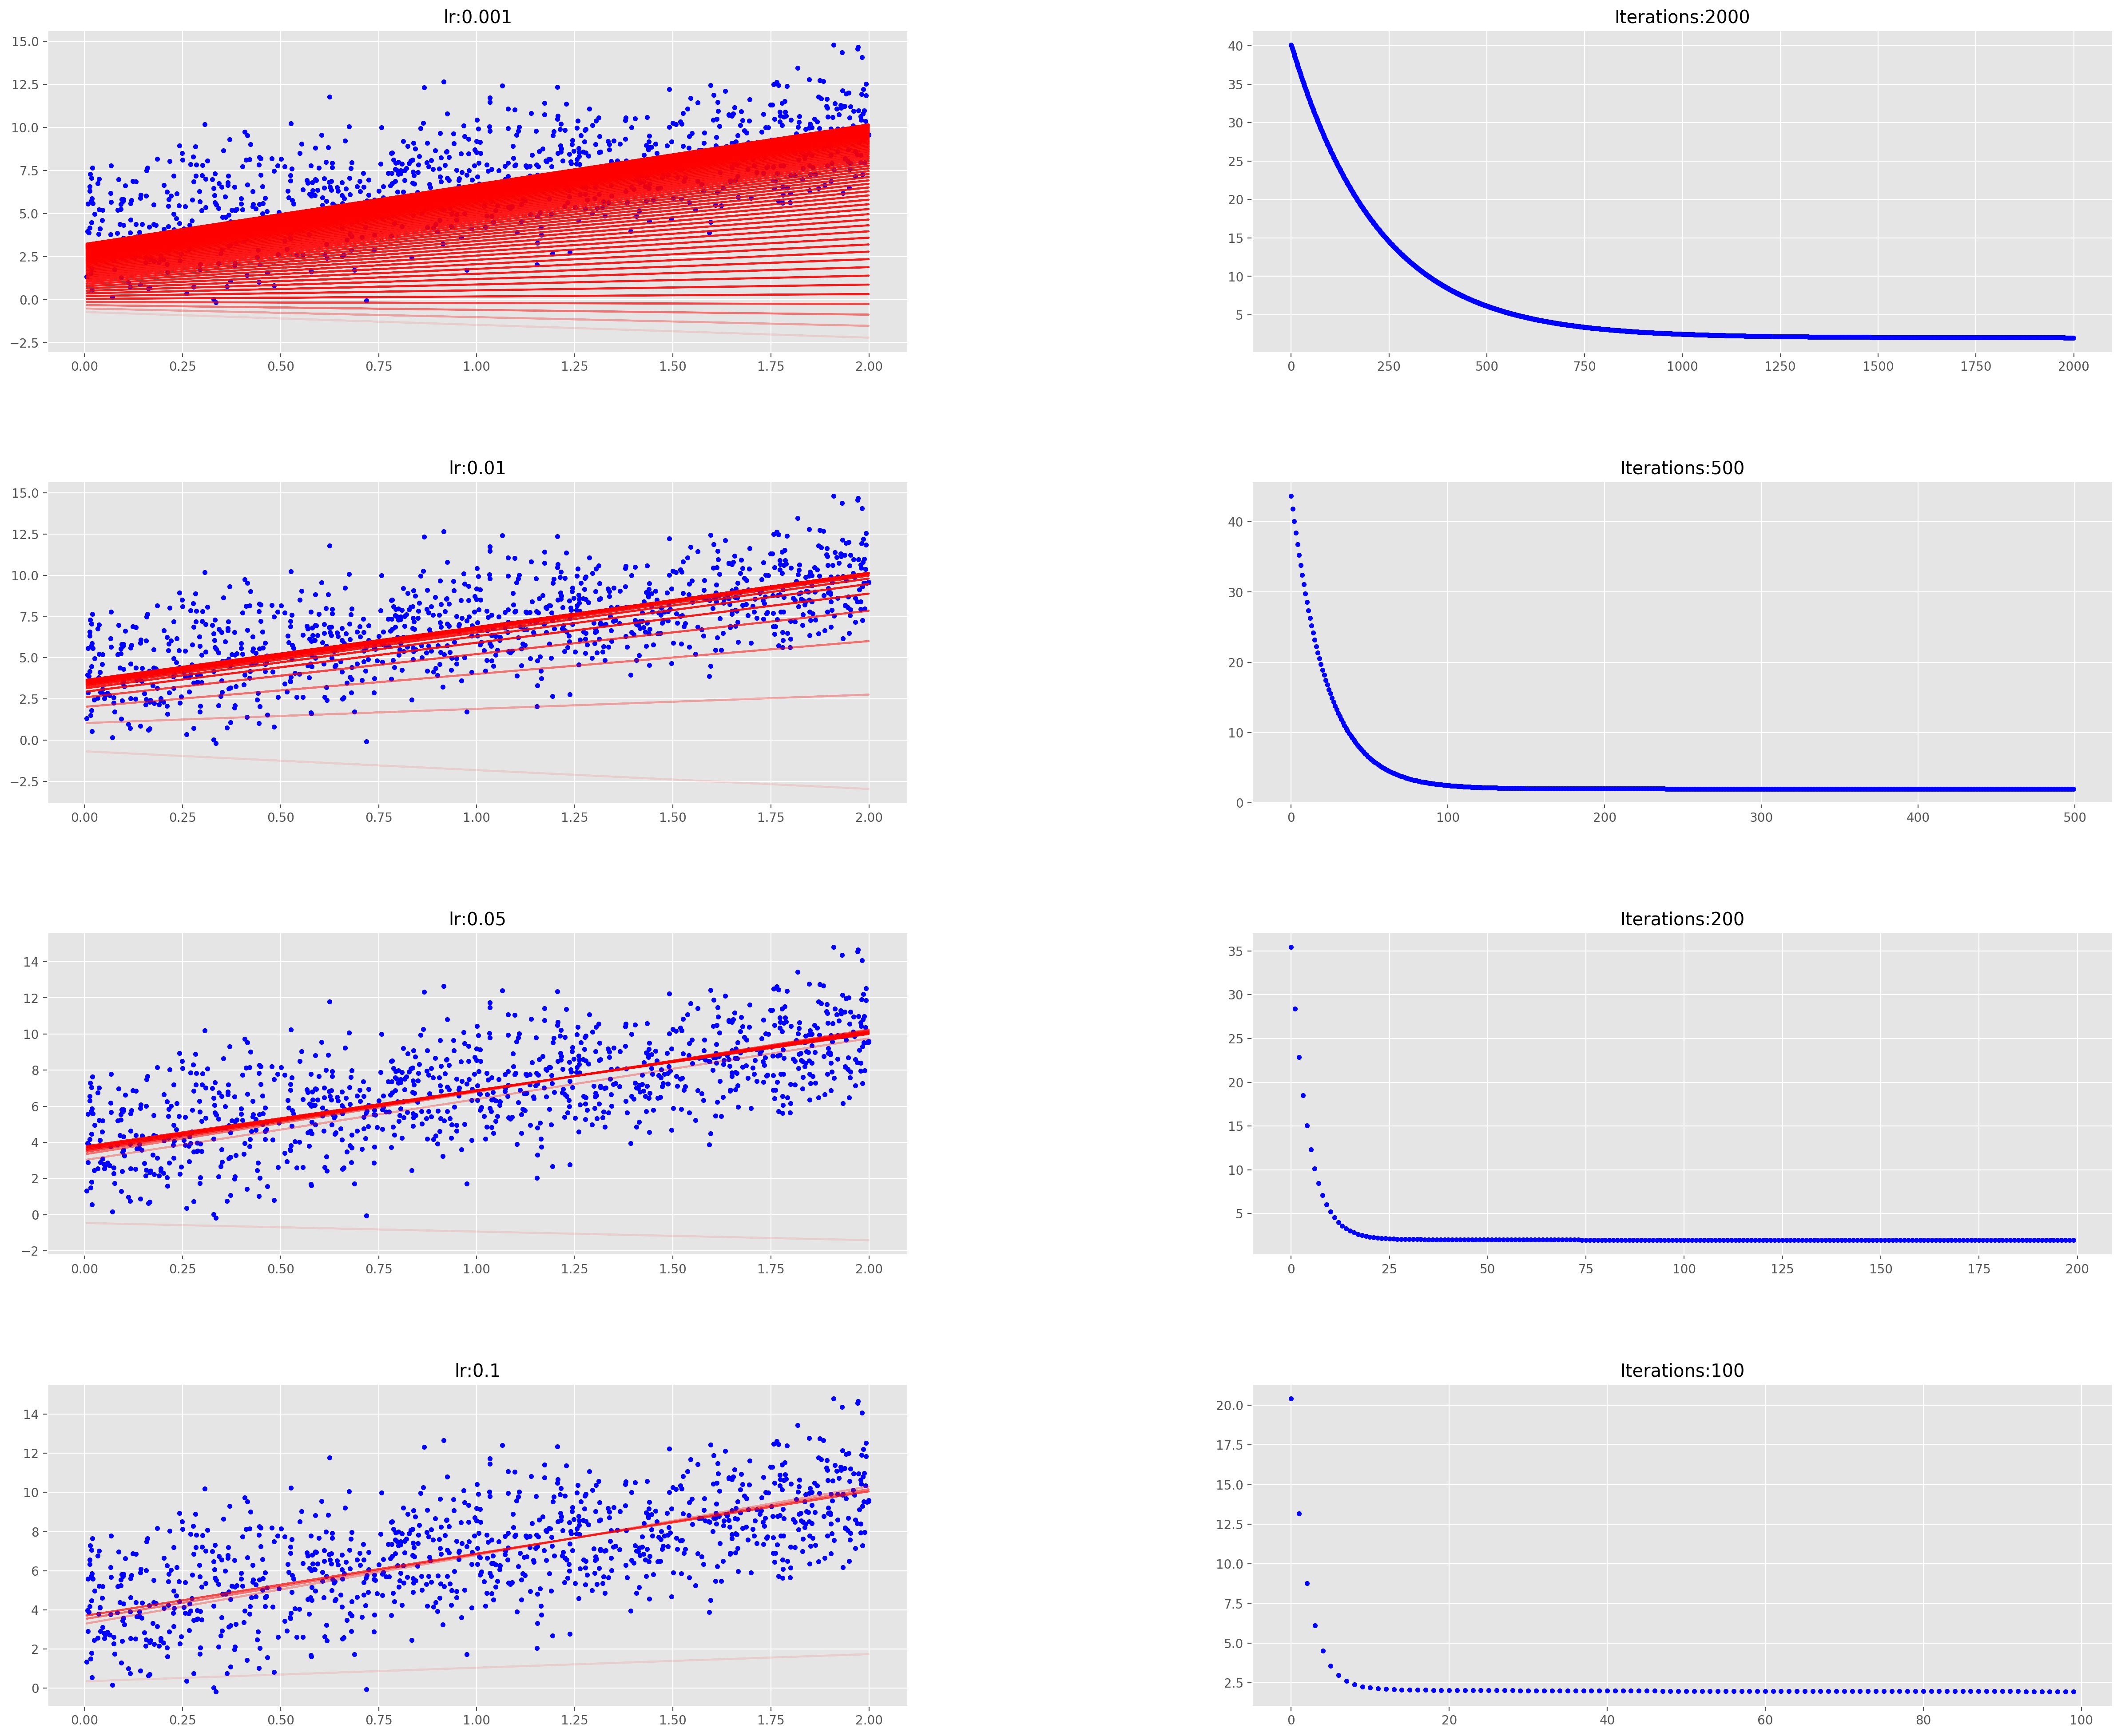

In [36]:
fig = plt.figure(figsize=(30, 25), dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr = [(2000, 0.001), (500, 0.01), (200, 0.05), (100, 0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4, 2, count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)

Ces graphes sont très utiles pour visualiser l'effet des taux d'apprentissage et des itérations sur la descente de gradient. Les lignes rouges montrent comment la descente de gradient commence et se rapproche lentement de la valeur finale.

Il est bien sur possible de tracer des plots individuels pour zoomer un peu plus fort.

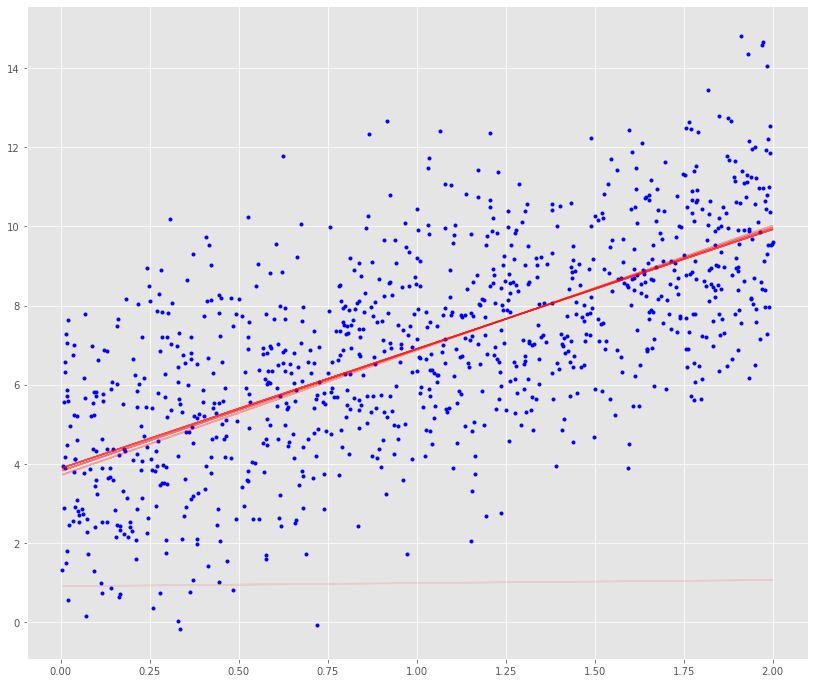

In [37]:
_, ax = plt.subplots(figsize=(14, 12))
plot_GD(100, 0.1, ax)

# Stochastic Gradient Descent

Voyons à présent la descente de gradient stochastique. Auparavant, nous avons implémenté la descente de gradient par batch, c'est à dire que nous passions l'ensemble des échantillons à chaque itération de la descente de gradient pour calculer la fonction de cout, calculer les gradients et mettre à jour les paramètres theta. 

Dans le cas de la descente de gradient stochastique, le gradient et les paramètres theta sont mis à jour à chaque nouvel échantillon. Le SGD est dit un algorithme online, car il permet de s'adapter à chaque nouvel échantillon non encore utilisé pour apprendre le paramètre theta.

### Question 4:

Completer la fonction de descente de gradient stochastic.

In [122]:
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    index = np.arange(m)
    for it in range(iterations):
        cost_sd = []
        np.random.shuffle(index)
        for i in index:
            X_i = X[i].reshape(1, X.shape[1])
            y_i = y[i].reshape(1, 1)
            prediction = X_i.dot(theta)
            theta -= (1 / m) * learning_rate * (X_i.T.dot(prediction - y_i))
            cost_sd.append(cost(theta, X_i, y_i))
        cost_history[it]  = np.mean(cost_sd)
    return theta, cost_history

In [123]:
lr = 0.01
n_iter = 500

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X), 1)), X]

start_time = time.time()
theta, cost_history = stochastic_gradient_descent(X_b, y, theta, lr, n_iter)
end_time = time.time()

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Temps écoulé:', end_time - start_time)

Theta0:          3.629,
Theta1:          3.233
Final cost/MSE:  1.972
Temps écoulé: 11.477483034133911


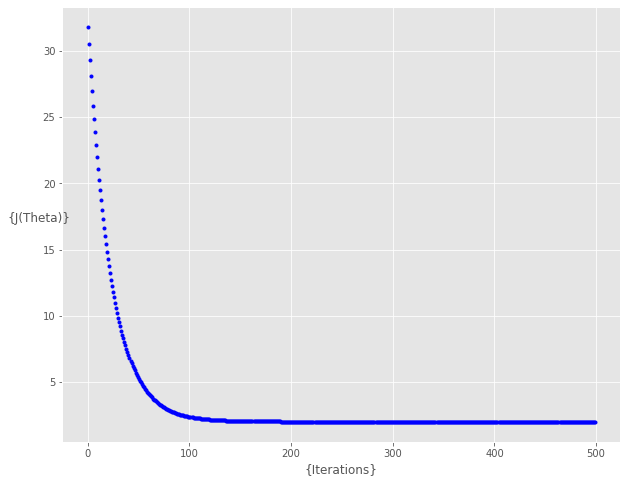

In [124]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylabel('{J(Theta)}', rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2, 1)

_ = ax.plot(range(n_iter), cost_history, 'b.')

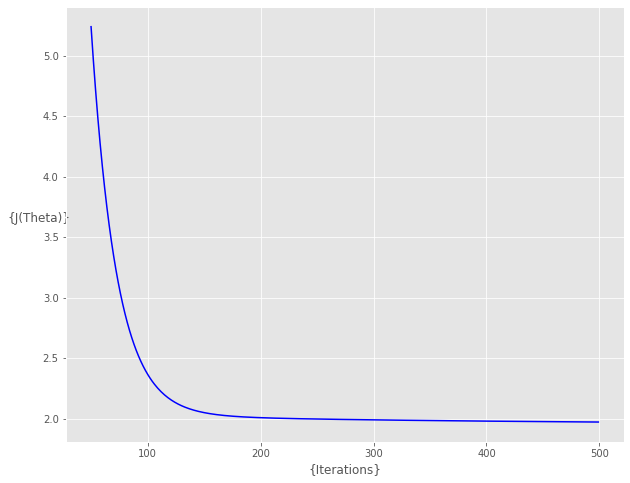

In [125]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylabel('{J(Theta)}', rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2, 1)

_ = ax.plot(range(50, 500), cost_history[50:500], 'b-')

# Mini Batch Gradient Descent

Implémentons à présent la descente de gradient par mini-batch. Cette fois-ci n (n étant la taille du batch) échantillons sont utilisés pour mettre à jour les variables.

### Question 5:

Completer la fonction suivante. N'oubliez pas de réaranger les indices au hasard à chacune des itérations.

In [126]:
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        costs = []
        
        #Réarrangement aléatoire des indices
        index = np.arange(m)
        np.random.shuffle(index)
        X = X[index]
        y = y[index]
        for i in range(0, m, batch_size):
            X_batch = X[i: i + batch_size]
            y_batch = y[i: i + batch_size]
            
            X_batch = np.c_[np.ones(len(X_batch)), X_batch]
           
            prediction = np.dot(X_batch, theta)

            theta -= (1 / m) * learning_rate * (X_batch.T.dot((prediction - y_batch)))
            costs.append(cost(theta, X_batch, y_batch))
        cost_history[it]  = np.mean(costs)
        
    return theta, cost_history

In [127]:
lr = .1
n_iter = 500

theta = np.random.randn(2, 1)

start_time = time.time()
theta, cost_history = minibatch_gradient_descent(X, y, theta, lr, n_iter)

end_time = time.time()

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Temps écoulé:', end_time - start_time)

Theta0:          4.026,
Theta1:          2.903
Final cost/MSE:  1.950
Temps écoulé: 1.544327735900879


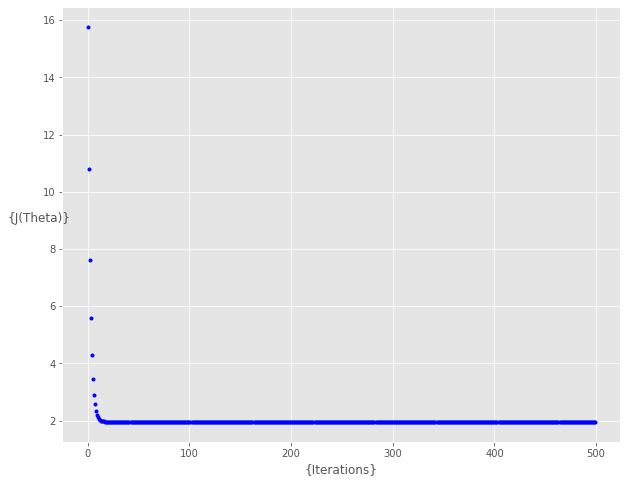

In [128]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

On peut avoir l'impression qu'a partir de 25 itérations, le gain est faible. 
Mais en zoomant sur la fonction de cout, on constate qu'on continue de réduire le coût au fur et à mesure des itérations.

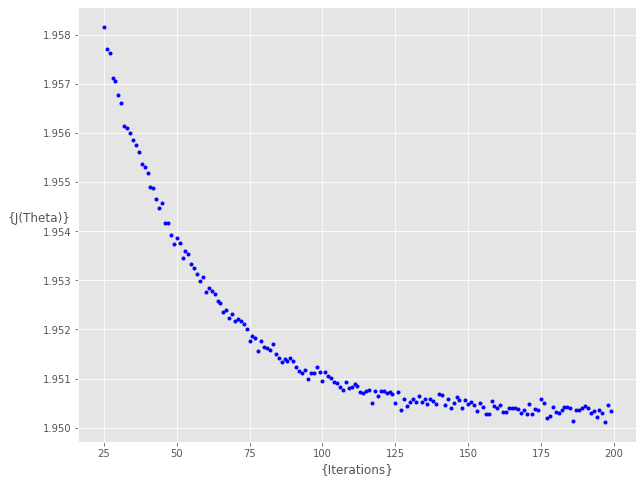

In [129]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')

_ = ax.plot(range(25,200), cost_history[25:200],'b.')

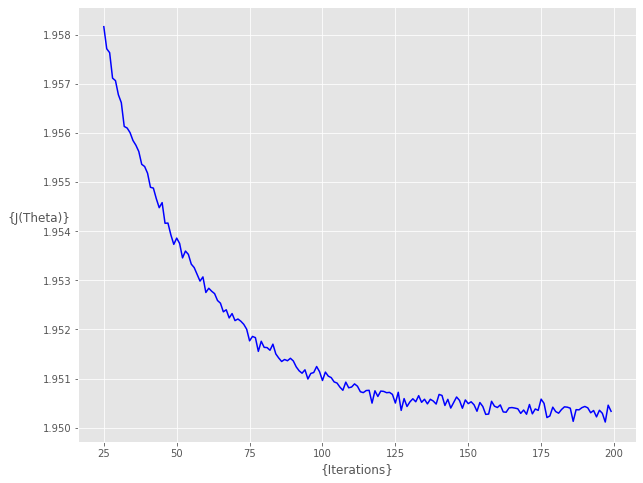

In [131]:
fig,ax = plt.subplots(figsize=(10, 8))

ax.set_ylabel('{J(Theta)}', rotation=0)
ax.set_xlabel('{Iterations}')

_ = ax.plot(range(25, 200), cost_history[25:200], 'b-')

### Question 6:

Comparer les différentes méthodes de descente de gradient, quels sont leurs avantages et cas d'utilisation ?

Vous pouvez vous appuyer sur le graphique suivant.


![alt text][logo]

[logo]: gradient_descent.png "Descente de gradient"

Pour aller plus loin, vous pouvez consulter cette excellente référence : 

https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html